In [29]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [30]:
bone_img=cv2.imread("C:\\Users\\thainguyen5484\\Downloads\\Bone.png",0)
joint_img=cv2.imread("C:\\Users\\thainguyen5484\\Downloads\\adjoint.png",0)

(-0.5, 849.5, 745.5, -0.5)

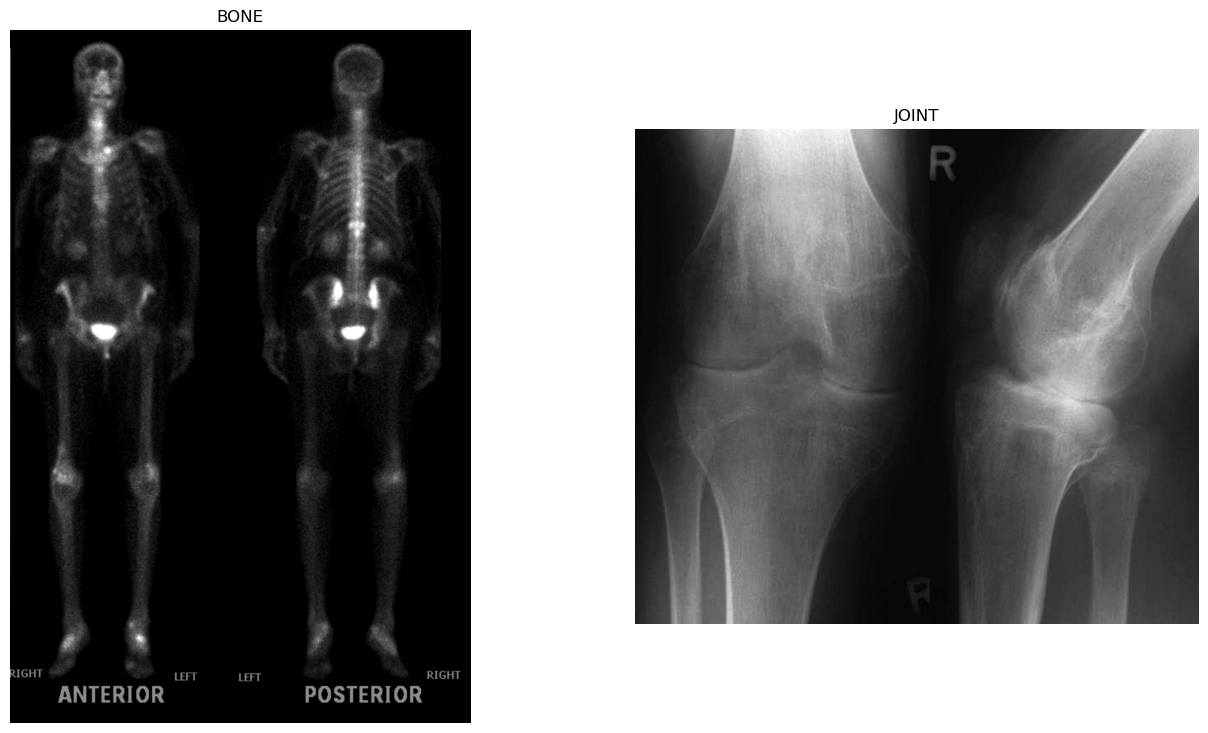

In [31]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title("BONE")
plt.imshow(bone_img,cmap="gray")
plt.axis("off")
plt.subplot(1,2,2)
plt.title("JOINT")
plt.imshow(joint_img,cmap="gray")
plt.axis("off")

In [32]:
##laplacian Filter (discrete Second derivative filter)
laplacian_1=np.array([[0,1,0],
                      [1,-4,1],
                      [0,1,0]])

laplacian_2=np.array([[1,1,1],[1,-8,1],[1,1,1]])


laplacian_3=-laplacian_1

##Sobel Filter (discrete first derivative)
sobel_X=np.array([[-1,-2,-1],
                  [0,0,0],
                  [1,2,1]])

sobel_Y=np.transpose(sobel_X)

## Prewitt Filter (discrete first derivative)
prewitt_X=np.array([[-1,0,1],
                    [-1,0,1],
                    [-1,0,1]])
prewitt_Y=np.transpose(prewitt_X)

##Average Filter 5x5
Average_filter=np.ones([5,5])*(1/25)


(-0.5, 849.5, 745.5, -0.5)

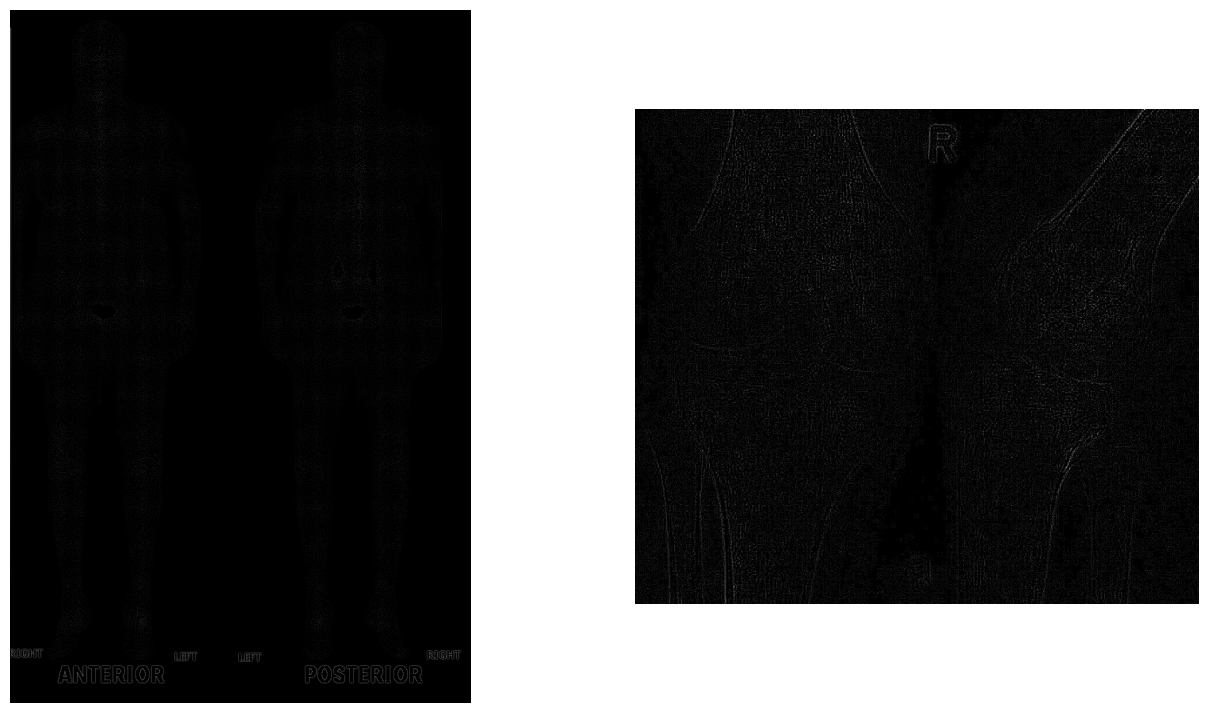

In [33]:
### STEP1: Use Laplacian filter of Bone Scan 
b_img=cv2.filter2D(bone_img,-1,laplacian_1)
b1_img=cv2.filter2D(joint_img,-1,laplacian_1)


plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.imshow(b_img,cmap="gray")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(b1_img,cmap="gray")
plt.axis("off")

(-0.5, 849.5, 745.5, -0.5)

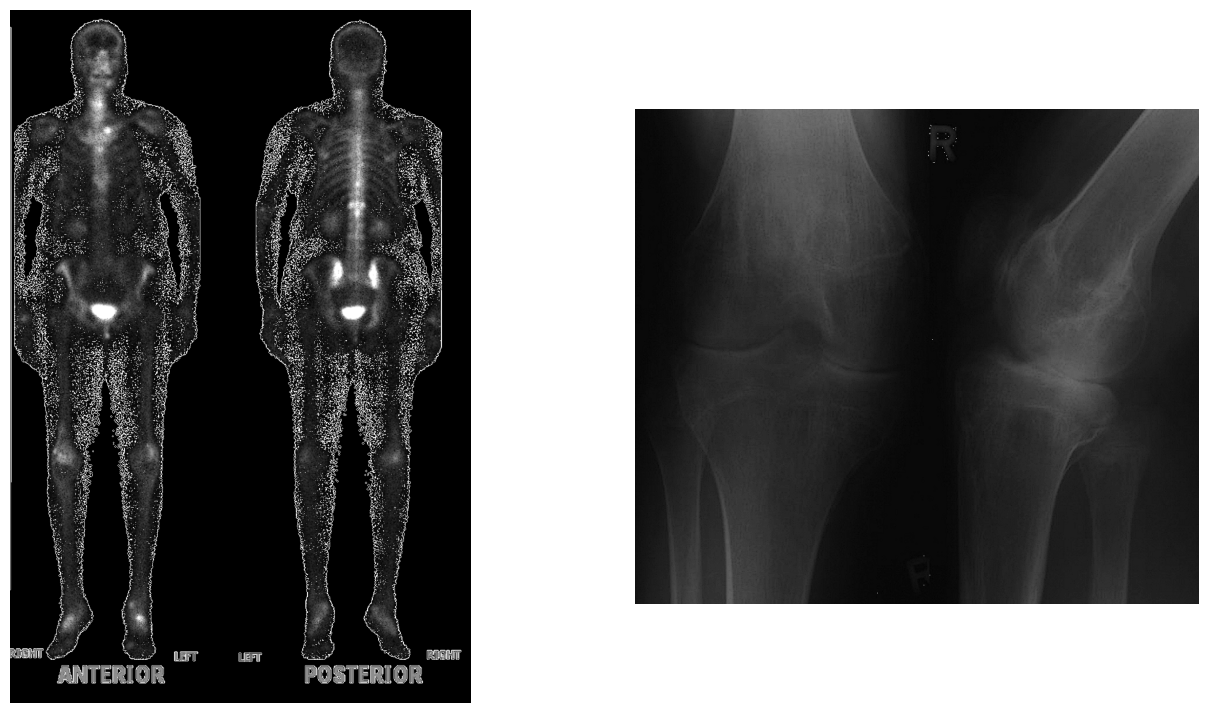

In [42]:
### STEP2: Subtract image with Step 1 image 
c_img=bone_img-b_img

c1_img=joint_img-b1_img

plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.imshow(c_img,cmap="gray")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(c1_img,cmap="gray")
plt.axis("off")

(-0.5, 849.5, 745.5, -0.5)

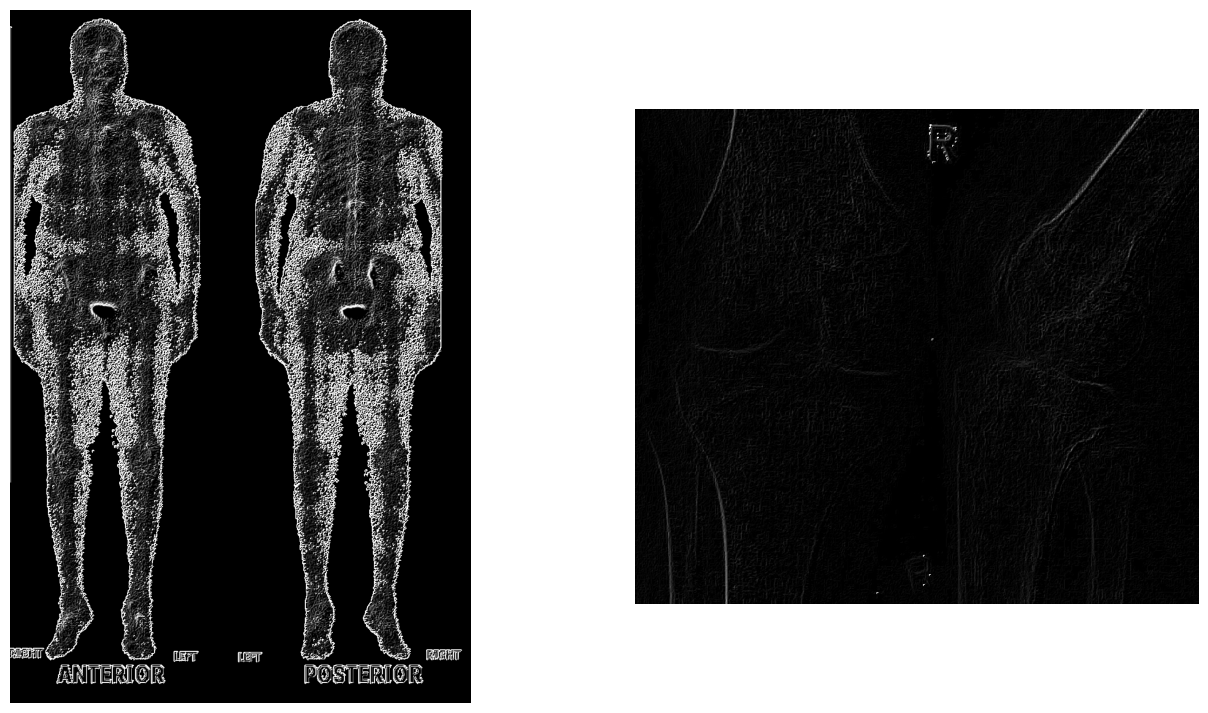

In [7]:
### STEP3: Use Sobel Filter with Step 2 image 

d_X=cv2.filter2D(c_img,-1,sobel_X)
d_Y=cv2.filter2D(c_img,-1,sobel_Y)
d1_X=cv2.filter2D(c1_img,-1,sobel_X)
d1_Y=cv2.filter2D(c1_img,-1,sobel_Y)

d_img=cv2.bitwise_or(d_X,d_Y)
d1_img=cv2.bitwise_or(d1_X,d1_Y)

plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.imshow(d_img,cmap="gray")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(d1_img,cmap="gray")
plt.axis("off")

(-0.5, 849.5, 745.5, -0.5)

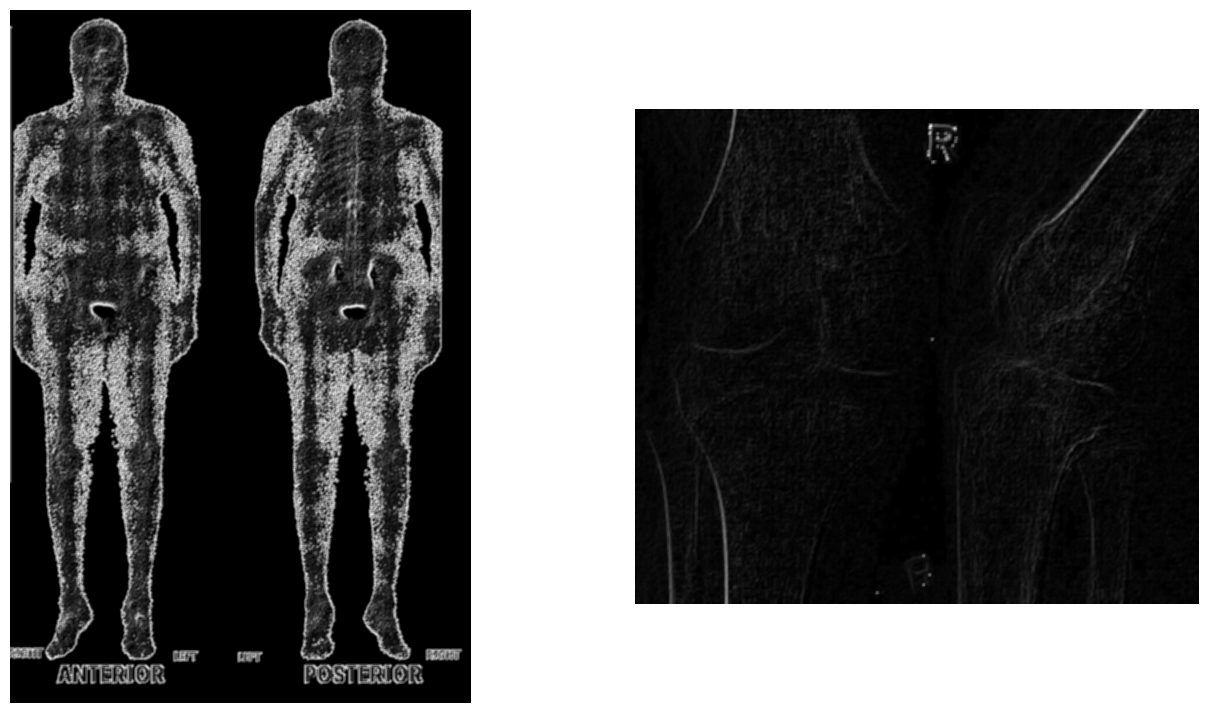

In [8]:
### STEP4: Smooth Step 3 image with 5*5 average filter 

e_img=cv2.filter2D(d_img,-1,Average_filter)
e1_img=cv2.filter2D(d1_img,-1,Average_filter)



plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.imshow(e_img,cmap="gray")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(e1_img,cmap="gray")
plt.axis("off")

(-0.5, 849.5, 745.5, -0.5)

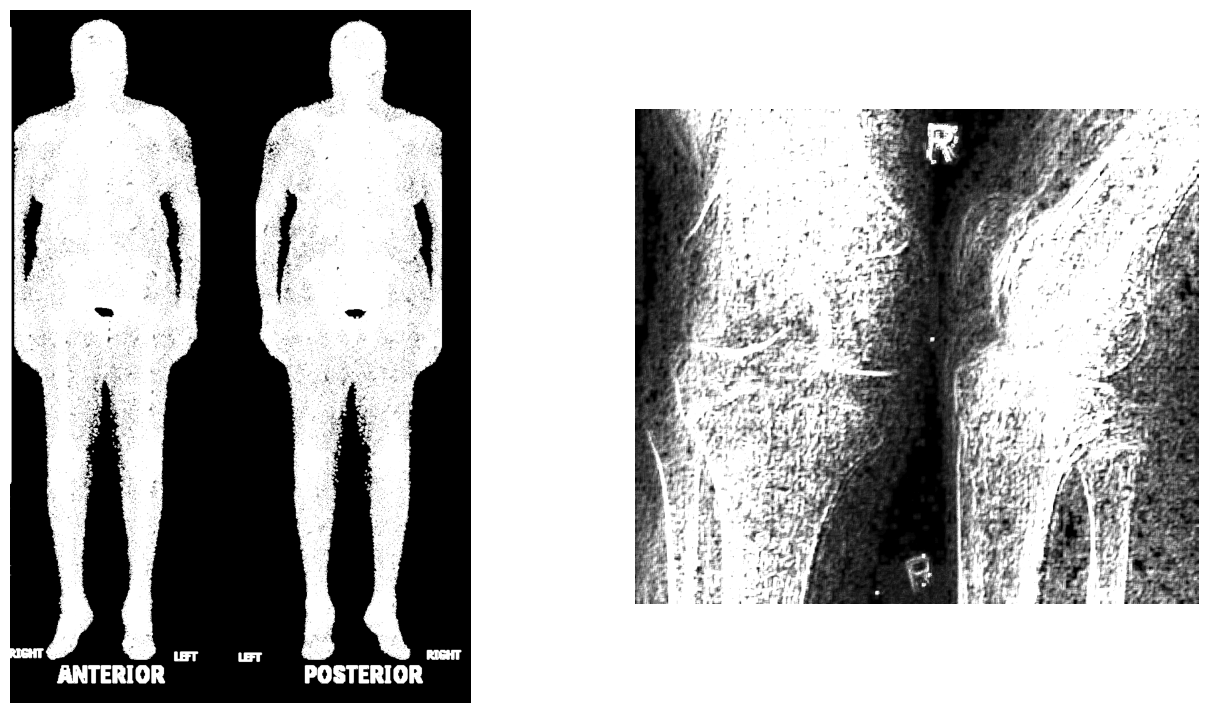

In [45]:
### STEP 5: Product of Step 2 and Step 4 

f_img=cv2.multiply(c_img,e_img)
f1_img=cv2.multiply(c1_img,e1_img)

plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.imshow(f_img,cmap="gray")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(f1_img,cmap="gray")
plt.axis("off")

(-0.5, 849.5, 745.5, -0.5)

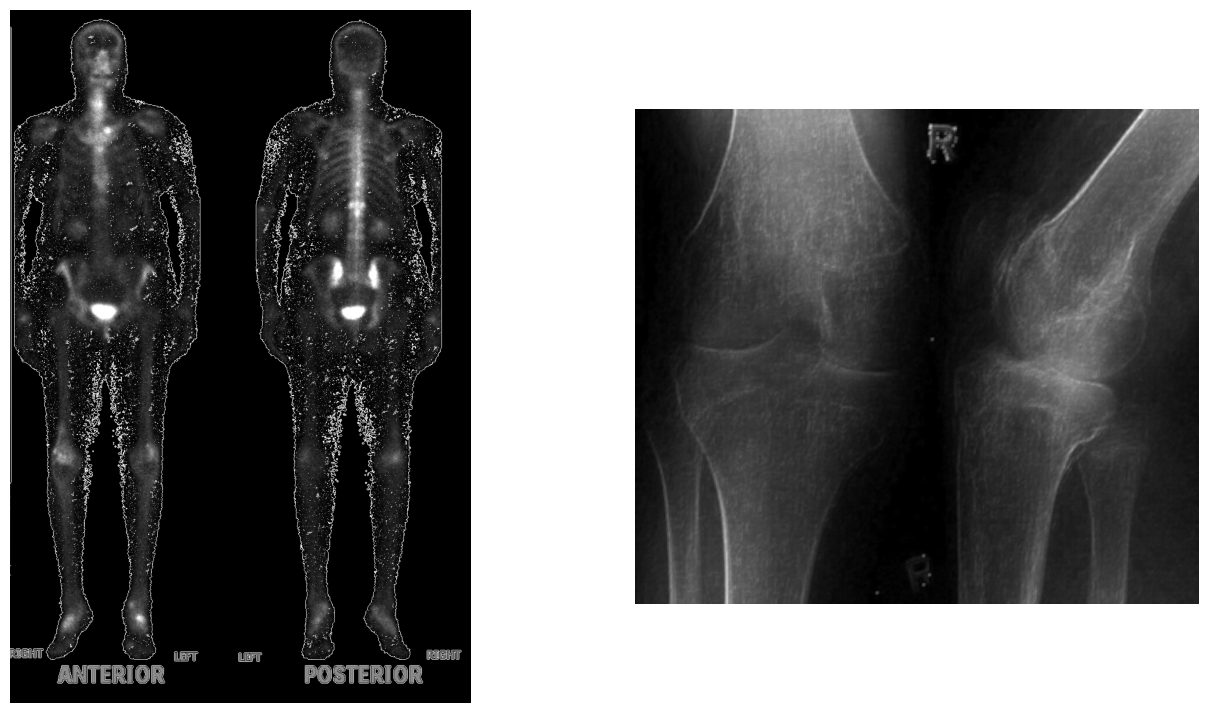

In [52]:
### STEP 6: sharptenered image(Sum of Step 1 and Step 5)

g_img=bone_img+f_img
g1_img=joint_img+e1_img



plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.imshow(g_img,cmap="gray")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(g1_img,cmap="gray")
plt.axis("off")

(-0.5, 849.5, 745.5, -0.5)

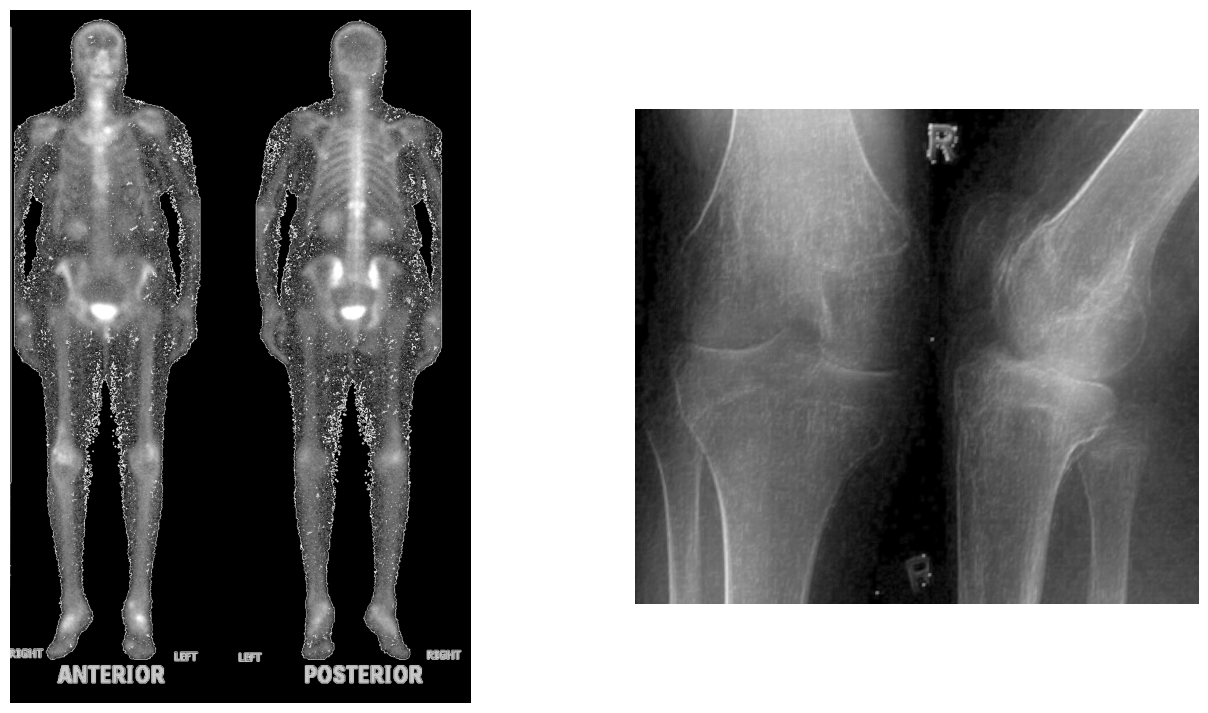

In [54]:
### STEP 7: use Power_Law Rule and apply to Step 6

C=5
gamma=0.4

def power_law(image,C,gamma):
    return C*pow(image,gamma)

h_img=power_law(g_img,C,gamma)
h1_img=power_law(g1_img,C,gamma)

plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.imshow(h_img,cmap="gray")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(h1_img,cmap="gray")
plt.axis("off")